In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
num_epochs = 15
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 7
num_batches = total_series_length//batch_size//truncated_backprop_length

In [5]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  
    y = y.reshape((batch_size, -1))

    return (x, y)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

In [6]:
tf.reset_default_graph()

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],1)  

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] 
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New epoch 0
Step  0 , loss =  0.750792
Step  100 , loss =  0.668942
Step  200 , loss =  0.692769
Step  300 , loss =  0.702386
Step  400 , loss =  0.68508
Step  500 , loss =  0.70122
Step  600 , loss =  0.6919
New epoch 1
Step  0 , loss =  0.668319
Step  100 , loss =  0.687189
Step  200 , loss =  0.692837
Step  300 , loss =  0.697508
Step  400 , loss =  0.699982
Step  500 , loss =  0.693207
Step  600 , loss =  0.674553
New epoch 2
Step  0 , loss =  0.684156
Step  100 , loss =  0.713381
Step  200 , loss =  0.691478
Step  300 , loss =  0.688937
Step  400 , loss =  0.700142
Step  500 , loss =  0.703858
Step  600 , loss =  0.683998
New epoch 3
Step  0 , loss =  0.699638
Step  100 , loss =  0.690764
Step  200 , loss =  0.698018
Step  300 , loss =  0.692581
Step  400 , loss =  0.697624
Step  500 , loss =  0.693175
Step  600 , loss =  0.693644
New epoch 4
Step  0 , loss =  0.694773
Step  100 , loss =  0.689794
Step  200 , loss =  0.707792
Step  300 , loss =  0.685612
Step  400 , loss =  0.6926

Step  100 , loss =  0.000240787
Step  200 , loss =  0.000196486
Step  300 , loss =  0.000183412
Step  400 , loss =  0.000211393
Step  500 , loss =  0.000171212
Step  600 , loss =  0.00016175
New epoch 37
Step  0 , loss =  0.1613
Step  100 , loss =  0.000159007
Step  200 , loss =  0.000167393
Step  300 , loss =  0.000141423
Step  400 , loss =  0.000125972
Step  500 , loss =  0.00013995
Step  600 , loss =  0.000138992
New epoch 38
Step  0 , loss =  0.17251
Step  100 , loss =  0.000155783
Step  200 , loss =  0.000158352
Step  300 , loss =  0.000143938
Step  400 , loss =  0.000143365
Step  500 , loss =  0.000155048
Step  600 , loss =  0.000158679
New epoch 39
Step  0 , loss =  0.122432
Step  100 , loss =  0.000200895
Step  200 , loss =  0.000144502
Step  300 , loss =  0.000123484
Step  400 , loss =  0.000128454
Step  500 , loss =  0.000150605
Step  600 , loss =  0.000129672
New epoch 40
Step  0 , loss =  0.189793
Step  100 , loss =  0.00016195
Step  200 , loss =  0.000164848
Step  300 , lo

KeyboardInterrupt: 

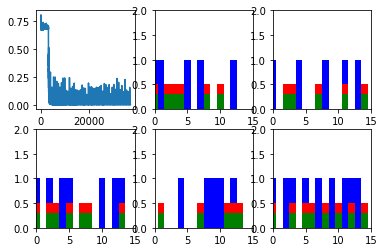

In [6]:
with tf.Session() as sess:
    
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []
    
    for epoch_index in range(num_epochs):
        x,y = generateData()
        c_state = np.zeros([batch_size,state_size])
        
        print('New epoch %d'%(epoch_index))
        for batch_index in range(num_batches):
            start_index = batch_index*truncated_backprop_length
            stop_index = start_index + truncated_backprop_length
            
            batchX = x[:,start_index:stop_index]
            batchY = y[:,start_index:stop_index]
            
            tl,ts,c_state,pr_series = sess.run([total_loss,train_step,current_state,predictions_series],feed_dict={
                batchX_placeholder: batchX,
                batchY_placeholder: batchY,
                init_state: c_state
            })
            
            loss_list.append(tl)
            
            if batch_index%100==0:
                print('Step ',batch_index,", loss = ",tl)
                plot(loss_list,pr_series,batchX,batchY)
    
    saver = tf.train.Saver()
    path = 'RNN_model_dir\\RNN_001.ckpt'
    save_path = saver.save(sess, path)
                
plt.ioff()
plt.show()

In [ ]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    path = 'RNN_model_dir\\RNN_001.ckpt'
    saver.restore(sess,path)
    
    